Лабораторна Робота № 3
Бінарна класифікація
Мета: набути навички препроцесингу даних для розв’язання задачі бінарної класифікації, побудови та тюнингу гіперпараметрів моделей класифікації: логістичної регресії та SVM; оцінки якості та порівняння моделей бінарної класифікації.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("hypertension_data.csv")

Провести первинний та ED аналіз даних, необхідний для визначення кроків препроцесингу даних;

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,51.0,1.0,0,140,192,0,1,148,0,0.4,1,0,1,1
6,42.0,0.0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,38.0,0.0,1,120,263,0,1,173,0,0.0,2,0,3,1
8,72.0,0.0,2,172,199,1,1,162,0,0.5,2,0,3,1
9,47.0,0.0,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Унікальні значення для стовбця "{column}": {unique_values}')

Унікальні значення для стовбця "age": [57. 64. 52. 56. 66. 51. 42. 38. 72. 47. 55. 63. 41. 81. 70. 62. 75. 69.
 39. 50. 59. 49. 34. 46. 40. 33. 67. 54. 60. 61. 45. 68. 58. 43. 65. 74.
 53. 76. 48. 44. 87. 71. 78. 77. 82. 73. 32. 29. 36. 83. 27. 84. 35. 31.
 86. 79. 80. 37. 22. 30. 28. 88. 85. 26. 25. 21. 23. 24. 19. 17. 12. 20.
 18. 16. 15. 11. 13. 14. 91. 97. 92. 93. 94. 96. 89. 90. 98. 95.]
Унікальні значення для стовбця "sex": [ 1.  0. nan]
Унікальні значення для стовбця "cp": [3 2 1 0]
Унікальні значення для стовбця "trestbps": [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
Унікальні значення для стовбця "chol": [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186

sex, exang , target , fbs - булеві


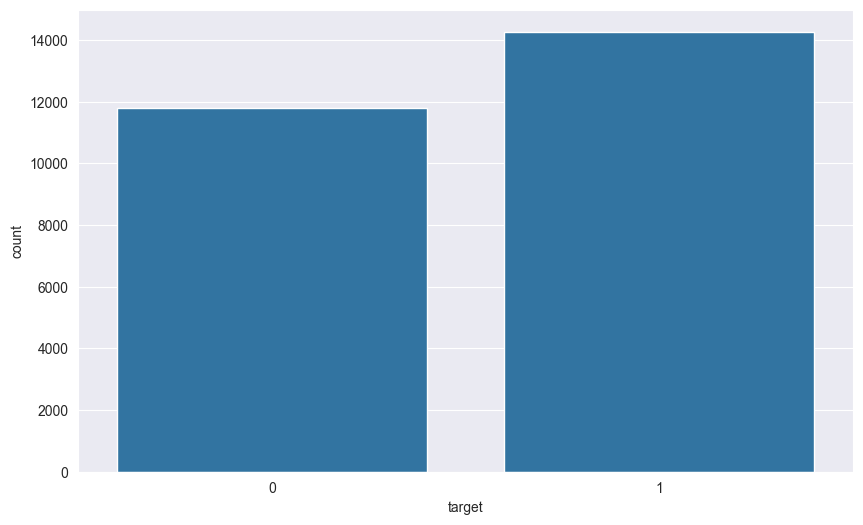

In [8]:
f , axs = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='target')
plt.show()

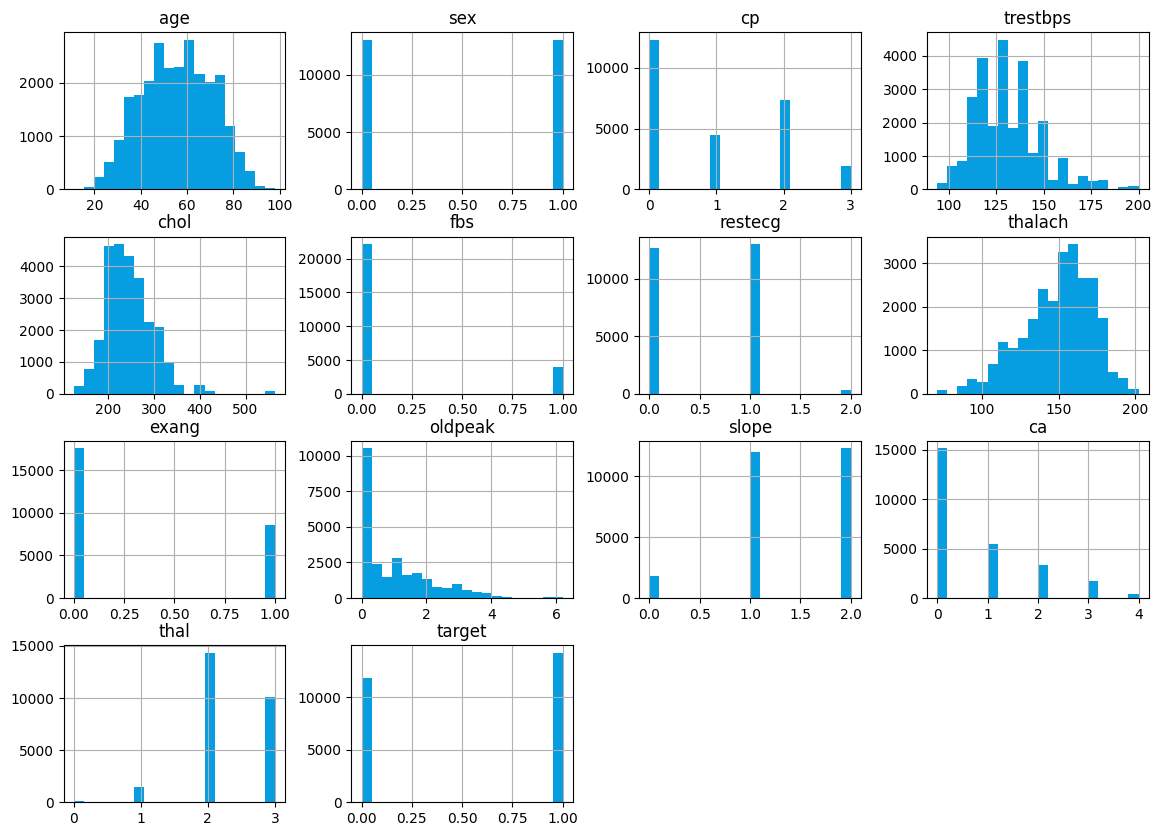

In [9]:
plt.style.use('default')
df.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

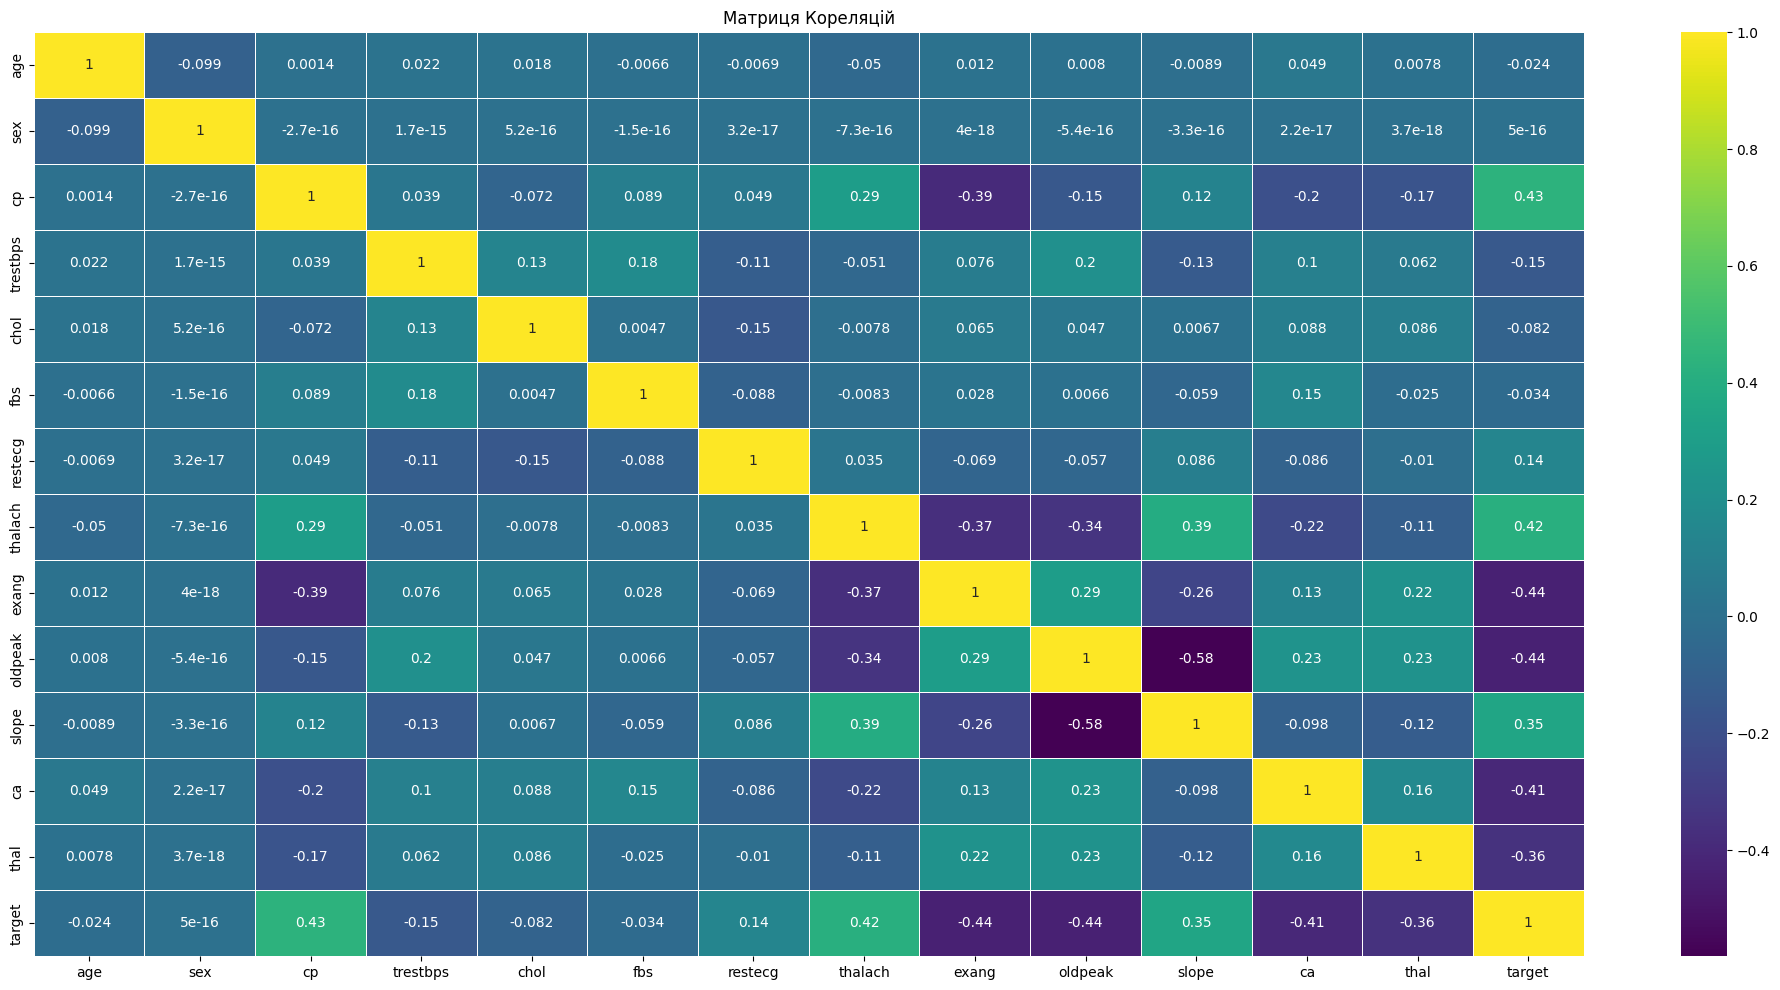

In [10]:
corr = df
corrplot = corr.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(corrplot, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Матриця Кореляцій')
plt.show()

На базі проведеного аналізу побудувати пайплайн(-и) препроцесингу даних [API: 1], (потенційно для кожної моделі окремо);

In [11]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

mapper = DataFrameMapper([
    (['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], StandardScaler()),
    (['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], SimpleImputer(strategy='most_frequent'))
])

X_train_prepr = mapper.fit_transform(X_train)
X_test_prepr = mapper.transform(X_test)

In [12]:
X_train_prepr

array([[ 0.08832683, -0.65874859,  0.67663134, ...,  1.        ,
         1.        ,  3.        ],
       [ 1.00888718, -0.65874859, -1.32500762, ...,  2.        ,
         0.        ,  2.        ],
       [-2.60759992, -0.77238724, -0.70313921, ...,  2.        ,
         0.        ,  2.        ],
       ...,
       [ 0.08832683,  1.15946995, -0.66427243, ...,  1.        ,
         0.        ,  3.        ],
       [-0.04318179,  2.75041116,  1.57056719, ...,  1.        ,
         0.        ,  2.        ],
       [ 1.07464149,  0.19354135,  0.15192987, ...,  1.        ,
         1.        ,  3.        ]])

In [13]:
X_test_prepr

array([[-1.68703957, -0.65874859, -1.13067374, ...,  1.        ,
         1.        ,  3.        ],
       [-1.55553095,  0.477638  , -0.76143937, ...,  2.        ,
         1.        ,  3.        ],
       [ 0.94313287,  2.18221787,  0.81266506, ...,  1.        ,
         0.        ,  3.        ],
       ...,
       [ 1.33765874, -0.77238724, -1.88857587, ...,  2.        ,
         3.        ,  2.        ],
       [-0.76647921, -0.0905553 ,  0.44343069, ...,  2.        ,
         0.        ,  2.        ],
       [-1.22675939,  0.02308336, -0.76143937, ...,  2.        ,
         0.        ,  3.        ]])

Побудувати модель логістичної регресії [API: 2]:

In [14]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': np.logspace(-4, 4, 20) 
}

grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_prepr, y_train)

print("Кращі гіперпараметри:", grid_search_logreg.best_params_)

Кращі гіперпараметри: {'C': 11.288378916846883, 'penalty': 'l2'}


In [15]:
y_pred_proba_logreg = grid_search_logreg.predict_proba(X_test_prepr)[:, 1]
y_pred_logreg = np.round(y_pred_proba_logreg)

In [16]:
def print_metrics_log_for_y_pred(y_test, y_pred):  
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print("\n\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
def print_metrics_log_for_y_pred_proba(y_test, y_pred_proba):
    print(f"Binary Crossentropy: {log_loss(y_test, y_pred_proba)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba)}")

In [17]:
print_metrics_log_for_y_pred_proba(y_test,y_pred_proba_logreg)
print_metrics_log_for_y_pred(y_test, y_pred_logreg)

Binary Crossentropy: 0.38048738595677845
ROC AUC: 0.9048633426805921
Accuracy: 0.8548974506421315
Precision: 0.8274032459425718
Recall: 0.9285464098073555
F1 Score: 0.8750618914012214


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2362
           1       0.83      0.93      0.88      2855

    accuracy                           0.85      5217
   macro avg       0.86      0.85      0.85      5217
weighted avg       0.86      0.85      0.85      5217


Побудувати матриці невідповідностей (confusion matrix [API: 5]) (без нормалізації, та дві нормалізованих (по recall та по precision, див. параметр normalize у відповідному API sklearn));

array([[1809,  553],
       [ 204, 2651]], dtype=int64)

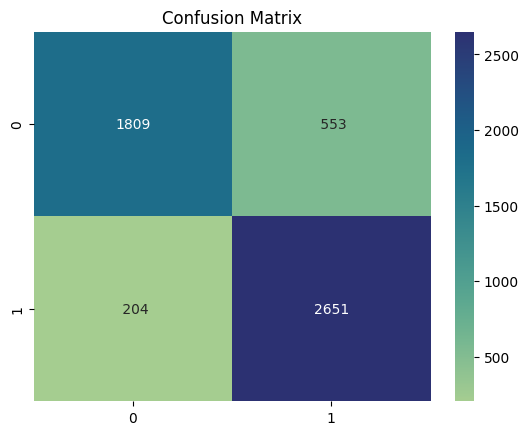

In [18]:
#без нормалізації
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

sns.heatmap(conf_matrix_logreg, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_logreg

array([[0.76587638, 0.23412362],
       [0.07145359, 0.92854641]])

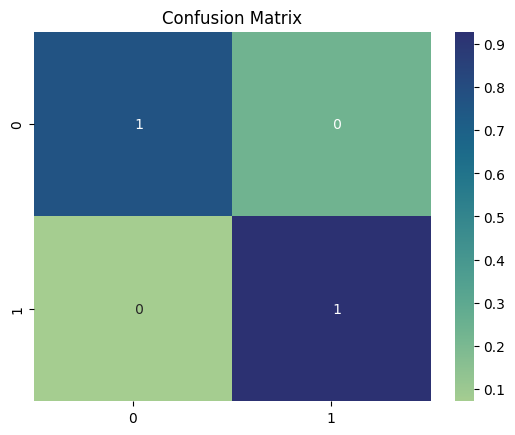

In [19]:
#по recall
conf_matrix_normalized_recall_logreg = confusion_matrix(y_test, y_pred_logreg, normalize='true')

sns.heatmap(conf_matrix_normalized_recall_logreg, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_normalized_recall_logreg

array([[0.89865872, 0.17259675],
       [0.10134128, 0.82740325]])

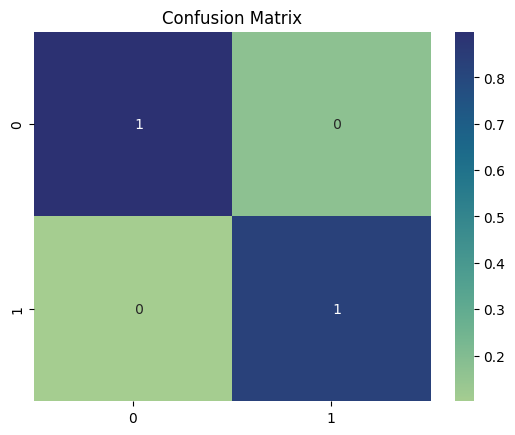

In [20]:
#по precision
conf_matrix_normalized_precision_logreg = confusion_matrix(y_test, y_pred_logreg, normalize='pred')

sns.heatmap(conf_matrix_normalized_precision_logreg, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_normalized_precision_logreg

Побудувати ROC криву для моделі [API: 6];

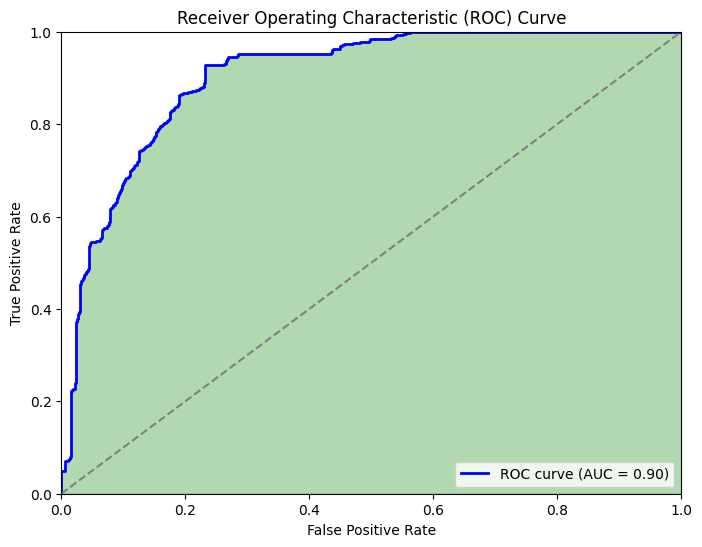

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)

# Розраховуємо площу під ROC кривою (AUC)
auc = roc_auc_score(y_test, y_pred_proba_logreg)

# Побудова ROC кривої
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.fill_between(fpr, tpr, color='green', alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Оцінити та відобразити feature importance за значеннями коефіцієнтів регресійної моделі (за умови скейлінгу/нормалізації фіч);

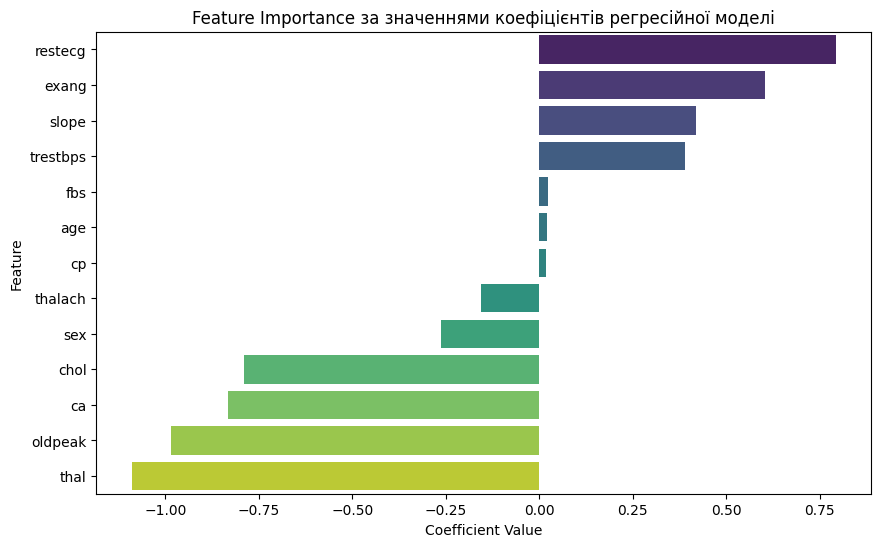

array([ 0.0198086 , -0.26294122,  0.0192235 ,  0.3895123 , -0.78991767,
        0.02431491,  0.79352005, -0.15527739,  0.60480674, -0.98545951,
        0.41990327, -0.83350291, -1.09020328])

In [22]:
coefficients = grid_search_logreg.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', hue='Feature', data=feature_importance, palette='viridis', legend=False)
plt.title('Feature Importance за значеннями коефіцієнтів регресійної моделі')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

coefficients

restecg та exang мають найбільший позитивний вплив, thal та oldpeak мають найбільший негативний вплив.

# SVM

Побудувати SVM класифікатор (1 - SVC з тюнингом ядра та 2 - LinearSVC) [API: 3]:


In [23]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly']
}

svc = SVC(max_iter=1000)
rand_search_svc = RandomizedSearchCV(svc, param_grid_svc,n_iter=8, cv=5, scoring='accuracy')
rand_search_svc.fit(X_train_prepr, y_train)

print("Кращі гіперпараметри для SVC:", rand_search_svc.best_params_)
print("Best score for SVC:", rand_search_svc.best_score_)

G:\Ilya\ML\venv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=8. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processi

Кращі гіперпараметри для SVC: {'kernel': 'rbf', 'C': 10}
Best score for SVC: 0.9995207399749984


G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [24]:
best_svc = SVC(**rand_search_svc.best_params_)
best_svc.fit(X_train_prepr, y_train)
y_pred_svc = best_svc.predict(X_test_prepr)

#y_pred_proba_svc = rand_search_svc.predict_proba(X_test_prepr)[:, 1]


print_metrics_log_for_y_pred_proba(y_test, y_pred_svc)
print_metrics_log_for_y_pred(y_test, y_pred_svc)

Binary Crossentropy: 2.220446049250313e-16
ROC AUC: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2362
           1       1.00      1.00      1.00      2855

    accuracy                           1.00      5217
   macro avg       1.00      1.00      1.00      5217
weighted avg       1.00      1.00      1.00      5217


array([[2362,    0],
       [   0, 2855]], dtype=int64)

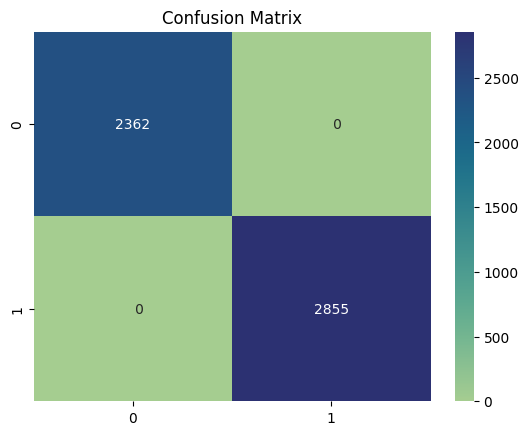

In [25]:
#без нормалізації
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

sns.heatmap(conf_matrix_svc, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_svc

array([[1., 0.],
       [0., 1.]])

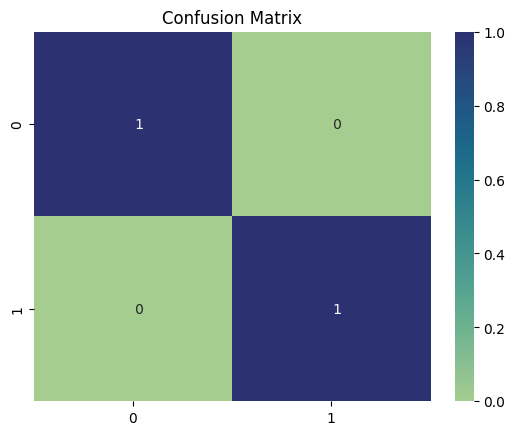

In [26]:
#по recall
conf_matrix_normalized_recall_svc = confusion_matrix(y_test, y_pred_svc, normalize='true')

sns.heatmap(conf_matrix_normalized_recall_svc, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_normalized_recall_svc

array([[1., 0.],
       [0., 1.]])

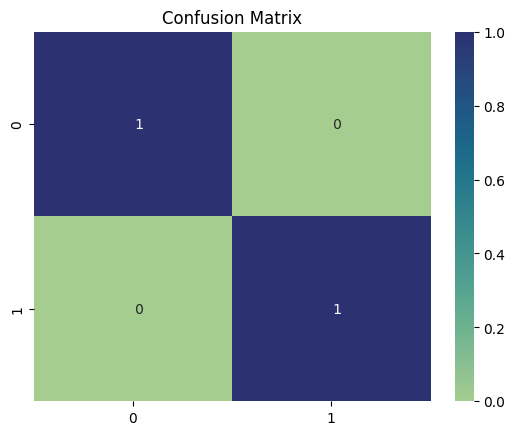

In [27]:
#по precision
conf_matrix_normalized_precision_svc = confusion_matrix(y_test, y_pred_svc, normalize='pred')

sns.heatmap(conf_matrix_normalized_precision_svc, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_normalized_precision_svc

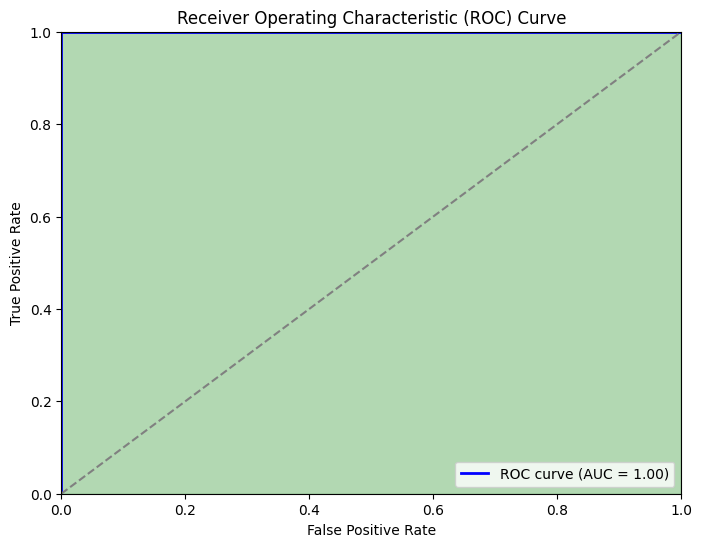

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)


auc = roc_auc_score(y_test, y_pred_svc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.fill_between(fpr, tpr, color='green', alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#  LinearSVC

In [29]:
param_grid_svc_linear = {
    'C': [0.1, 1, 10],
}

svc_linear = SVC(kernel='linear', max_iter=1000)

rand_search_svc_linear = RandomizedSearchCV(svc_linear, param_grid_svc_linear, n_iter=3, cv=5, scoring='accuracy')
rand_search_svc_linear.fit(X_train_prepr, y_train)


print("Кращі гіперпараметри для SVC з ядром linear:", rand_search_svc_linear.best_params_)
print("Best score for SVC з ядром linear:", rand_search_svc_linear.best_score_)

G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with

Кращі гіперпараметри для SVC з ядром linear: {'C': 0.1}
Best score for SVC з ядром linear: 0.7204126144168865


G:\Ilya\ML\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [30]:
y_pred_svc_linear = rand_search_svc_linear.predict(X_test_prepr)

print_metrics_log_for_y_pred(y_test, y_pred_svc_linear)
print_metrics_log_for_y_pred_proba(y_test, y_pred_svc_linear)

Accuracy: 0.7510063254744106
Precision: 0.7157515252357183
Recall: 0.9040280210157619
F1 Score: 0.7989475313418976


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.57      0.67      2362
           1       0.72      0.90      0.80      2855

    accuracy                           0.75      5217
   macro avg       0.77      0.74      0.74      5217
weighted avg       0.77      0.75      0.74      5217

Binary Crossentropy: 8.974641700682994
ROC AUC: 0.7350368724892526


array([[1337, 1025],
       [ 274, 2581]], dtype=int64)

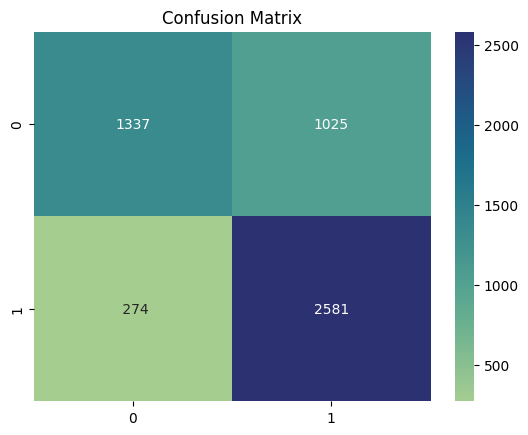

In [31]:
#без нормалізації
conf_matrix_svc_linear = confusion_matrix(y_test, y_pred_svc_linear)

sns.heatmap(conf_matrix_svc_linear, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_svc_linear

array([[0.56604572, 0.43395428],
       [0.09597198, 0.90402802]])

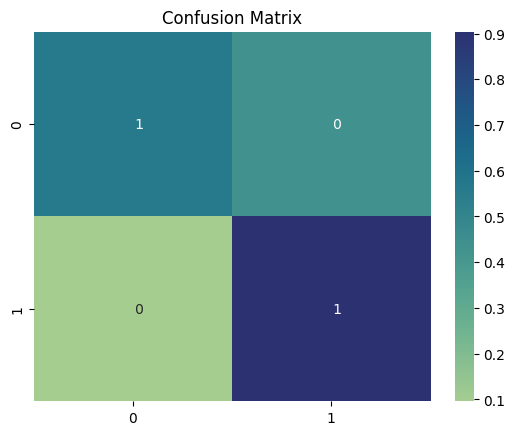

In [32]:
#по recall
conf_matrix_normalized_recall_svc_linear = confusion_matrix(y_test, y_pred_svc_linear, normalize='true')

sns.heatmap(conf_matrix_normalized_recall_svc_linear, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_normalized_recall_svc_linear

array([[0.8299193 , 0.28424847],
       [0.1700807 , 0.71575153]])

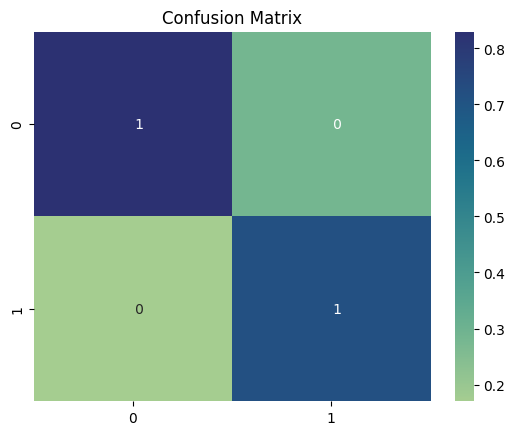

In [33]:
#по precision
conf_matrix_normalized_precision_svc_linear = confusion_matrix(y_test, y_pred_svc_linear, normalize='pred')

sns.heatmap(conf_matrix_normalized_precision_svc_linear, annot=True, fmt="4.0f", cmap="crest")
plt.title("Confusion Matrix")
conf_matrix_normalized_precision_svc_linear

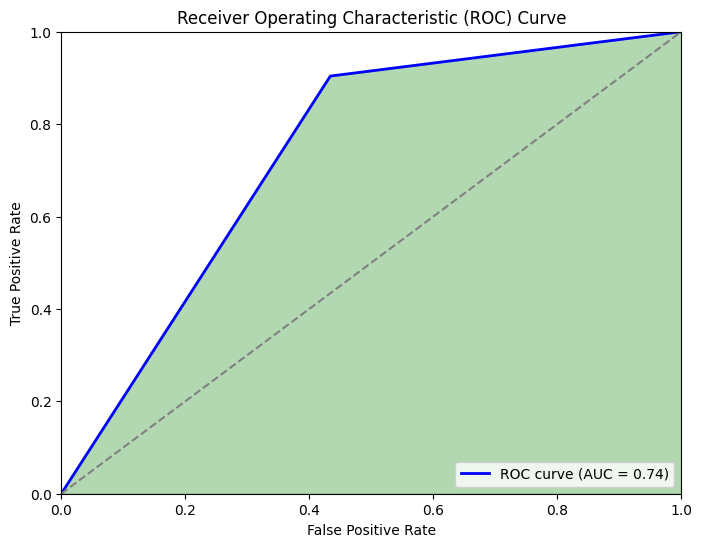

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_linear)

# Розраховуємо площу під ROC кривою (AUC)
auc = roc_auc_score(y_test, y_pred_svc_linear)

# Побудова ROC кривої
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.fill_between(fpr, tpr, color='green', alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [38]:
def calculate_metrics(y_test, predictions):
    binary_crossentropy = log_loss(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    return {
        'Binary Crossentropy': binary_crossentropy,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

metric_log = calculate_metrics(y_test, y_pred_logreg)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_svc_lin = calculate_metrics(y_test, y_pred_svc_linear)

metrics_data = {
    'Model': ['Log', 'SVC', 'SVC_Lin'],
    'Binary Crossentropy': [metric_log['Binary Crossentropy'], metrics_svc['Binary Crossentropy'], metrics_svc_lin['Binary Crossentropy']],
    'Accuracy': [metric_log['Accuracy'], metrics_svc['Accuracy'], metrics_svc_lin['Accuracy']],
    'Precision': [metric_log['Precision'], metrics_svc['Precision'], metrics_svc_lin['Precision']],
    'Recall': [metric_log['Recall'], metrics_svc['Recall'], metrics_svc_lin['Recall']],
    'F1 Score': [metric_log['F1 Score'], metrics_svc['F1 Score'], metrics_svc_lin['F1 Score']],
    'ROC AUC': [metric_log['ROC AUC'], metrics_svc['ROC AUC'], metrics_svc_lin['ROC AUC']]
}

metrics_df = pd.DataFrame(metrics_data)

print(metrics_df)

     Model  Binary Crossentropy  Accuracy  Precision    Recall  F1 Score  \
0      Log         5.230026e+00  0.854897   0.827403  0.928546  0.875062   
1      SVC         2.220446e-16  1.000000   1.000000  1.000000  1.000000   
2  SVC_Lin         8.974642e+00  0.751006   0.715752  0.904028  0.798948   

    ROC AUC  
0  0.847211  
1  1.000000  
2  0.735037  
